## Implementing of the K-Means Clustering for 5 Stacks

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random 
from PIL import Image

In [2]:
dataset=make_blobs(n_samples=1000,n_features=2,centers=5)

In [3]:
X=dataset[0]
y=dataset[1]

In [4]:
sc= StandardScaler()
X=sc.fit_transform(X)

Text(0.5, 1.0, 'All Data with Clusters Colored')

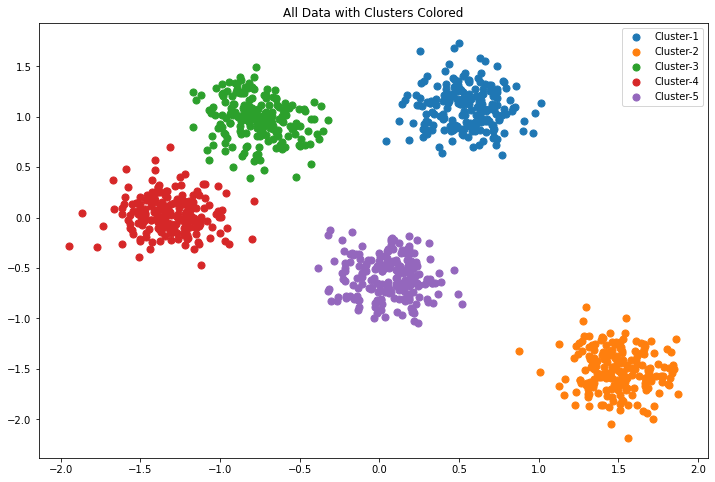

In [5]:
fig=plt.figure(figsize=(12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=50, label="Cluster-1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=50, label="Cluster-2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=50, label="Cluster-3")
plt.scatter(X[y == 3, 0], X[y == 3, 1], s=50, label="Cluster-4")
plt.scatter(X[y == 4, 0], X[y == 4, 1], s=50, label="Cluster-5")
plt.legend()
plt.title('All Data with Clusters Colored')

Text(0.5, 1.0, 'All Data')

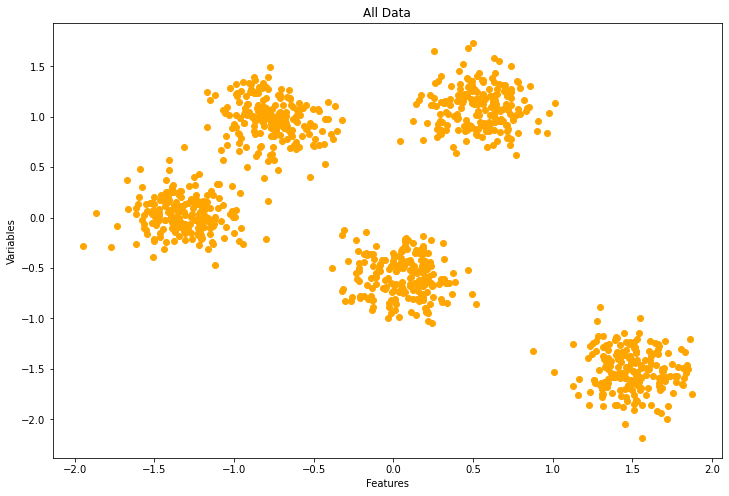

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('All Data')

#### Description of the K-Means Clustering 

* **#1** **euclidean_distance()** : The metric used to calculate the distance between points.

* **#2** **calculate_cluster_centers()** : Calculates center points of cluster stacks. 
    
    **If 'k-means++' is selected** : The 0th index center of the cluster is **randomly** selected from the X_train, the other centers are 0. 
    
     The distance of the center point to the points in each row of the X_train is calculated with **euclidean_distance()** by iterating as many as **n_clusters**. 
    
     Calculated **distances** values are normalized. The reason for this is **the p part of the np.random.choice()** method, which is used to determine the **indexes of the cluster_centers in the bottom line**. This method, which works according to the **probabilistic distribution**, helps to find the center points more accurately. The specified indexes **(centroid_idx)** are assigned to the 0 elements of the **cluster_centers** in the form of **X_train[centroid_idx]**.
     
     **If 'random' is selected** : Elements in the min and max rows of X_train are selected. **Randomly uniform** **cluster_centers** whose intervals are these points are determined.
     
* **#3** **cluster_method()** : **cluster_centers** is created. The iteration continues until the **prev_cluster_centers** and any clustercenter point among the **cluster_centers** are equal and the **max_iter** number is reached.

    The distance between the elements in each row of x_train and each cluster center point is found with **euclidean_distance()**, assigned to **distances**. The **minimum index** of **distances**, that is, the closest distance, is found and assigned to **closest_idx**. Elements in the current row of X_train in the loop are assigned to the list corresponding to the **closest_idx index** inside the nested list structure named **sorted_**.
    
    Each of the lists stored in **sorted_** has **averaged** (mean) and assigned to **cluster_centers**.
    
    **prev_cluster_centers** is created to avoid **np.nan**. If any **cluster_centers** element equals to **np.nan**,assigned to **prev_cluster_centers** with an index whitch element equals to **np.nan** .
    
* **#4** **fit()** : **calculate_cluster_centers()** returns **cluster_centers_**.

* **#5** **predict()** : The closest points to the **cluster_centers_** in the 3rd stage (**#3**) are selected and clustered.

    The distance between each row of X_test and **cluster_centers_** is found with **euclidean_distance()**, assigned to **distances**. 

    The minimum index of distances is assigned to **closest_idx**. The **predict_idxs** returned by the method is also assigned **closest_idx**.
    

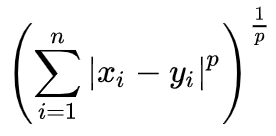

In [7]:
Image.open('Figures/minkowski.png')

**p=2** equals to **euclidean distance**

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
class KMeans_mine():
    
    """
    
    K-Means clustering.
    
    Hyperparameters::
    
        init : {‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
        Method for initialization:

            ‘k-means++’ : selects initial cluster centroids using sampling based on an 
            empirical probability distribution of the points’ contribution to the overall inertia. 
    
            ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.
    
        n_clusters : int, default=8
        The number of clusters to form as well as the number of centroids to generate.
        
        max_iter : int, default=300
        Maximum number of iterations of the k-means algorithm for a single run.
        
    
    Attributes::
    
        cluster_centers_ : Coordinates of cluster centers. 
        
        
    """
    
    
    def __init__(self,n_clusters=8,max_iter=300,init='k-means++',cluster_centers_=None):
        
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.init=init
        self.cluster_centers_=cluster_centers_
        
        
    def euclidean_distance(self,centroid,X):
        
        return np.power(np.sum(abs(centroid - X)**2, axis=1,dtype=float),0.5) 
    
    
    def calculate_cluster_centers(self,X):
        
        if self.init=='k-means++':
        
            cluster_centers=np.zeros((self.n_clusters,X.shape[1]))
            cluster_centers[0]=random.choice(X)
        
            for idx in range(1,self.n_clusters):
            
                distances= np.sum([self.euclidean_distance(centroid, X) for centroid in cluster_centers], axis=0) #X=X_train
                distances /= np.sum(distances)
                centroid_idx=np.random.choice(range(len(X)), size=1, p=distances)[0]
                cluster_centers[idx]=X[centroid_idx]
            
            return cluster_centers
        
        elif self.init=='random':
            
            min_args= np.min(X, axis=0)
            max_args = np.max(X, axis=0)
            cluster_centers = [np.random.uniform(min_args, max_args) for _ in range(self.n_clusters)]
            
            return cluster_centers
        
    
    def cluster_method(self,X):
        
        cluster_centers=self.calculate_cluster_centers(X)
        iter_ = 0
        prev_cluster_centers = None
        
        while np.not_equal(cluster_centers, prev_cluster_centers).any() and iter_ <self.max_iter:
            
            sorted_ = [[] for _ in range(self.n_clusters)]
                
            for x_train in X:
                    
                distances = self.euclidean_distance(cluster_centers,x_train)
                closest_idx = np.argmin(distances)
                sorted_[closest_idx].append(x_train)
                
            prev_cluster_centers = cluster_centers 
            cluster_centers = [np.mean(cluster, axis=0) for cluster in sorted_]
            
            for idx, centroid in enumerate(cluster_centers):
                    
                    if np.isnan(centroid).any(): 
                        
                        cluster_centers[idx] = prev_cluster_centers[idx]
                           
            iter_ += 1
            
        return cluster_centers
        
       
    
    def fit(self,X,y=None):
        
        self.cluster_centers_=self.cluster_method(X)
        

    def predict(self,X): #X=X_test
        
        predict_idxs= np.zeros(X.shape[0])
        for idx,x_test in enumerate(X):
            
            distances = self.euclidean_distance(x_test,self.cluster_centers_)
            closest_idx = np.argmin(distances)
            predict_idxs[idx]=closest_idx
            
        return predict_idxs
            
    
  

#### Hand-made Results

In [10]:
from sklearn.metrics import homogeneity_score,completeness_score

In [11]:
model=KMeans_mine(n_clusters=5,max_iter=300,init='k-means++')

In [20]:
model.fit(X_train,y_train)

In [21]:
yhat_mine=model.predict(X_test)

In [22]:
homogeneity_score(y_test,yhat_mine)

0.9897989481837614

In [23]:
completeness_score(y_test,yhat_mine)

0.9900787463384652

Text(0.5, 1.0, 'All Data with Clusters Colored')

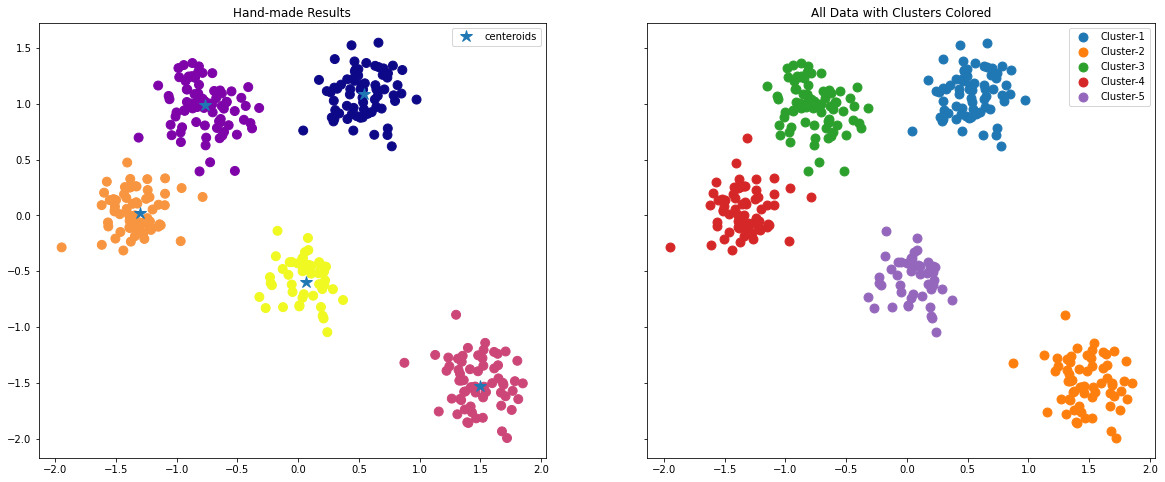

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[:,0],X_test[:,1],s=80,c=yhat_mine,cmap='plasma')
ax1.plot([x for x, _ in model.cluster_centers_],
         [y for _, y in model.cluster_centers_],
         '*',markersize=12,label='centeroids')
ax1.set_title('Hand-made Results')
ax1.legend()
ax2.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=80, label="Cluster-1")
ax2.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=80, label="Cluster-2")
ax2.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], s=80, label="Cluster-3")
ax2.scatter(X_test[y_test == 3, 0], X_test[y_test == 3, 1], s=80, label="Cluster-4")
ax2.scatter(X_test[y_test == 4, 0], X_test[y_test == 4, 1], s=80, label="Cluster-5")
ax2.legend()
ax2.set_title('All Data with Clusters Colored')


#### Sklearn Results

In [25]:
from sklearn.cluster import KMeans

In [26]:
model=KMeans(n_clusters=5,init='k-means++')

In [27]:
model.fit(X_train,y_train)

KMeans(n_clusters=5)

In [28]:
yhat_sklearn=model.predict(X_test)

In [29]:
homogeneity_score(y_test,yhat_sklearn)

0.9897989481837615

In [30]:
completeness_score(y_test,yhat_sklearn)

0.9900787463384654

Text(0.5, 1.0, 'All Data with Clusters Colored')

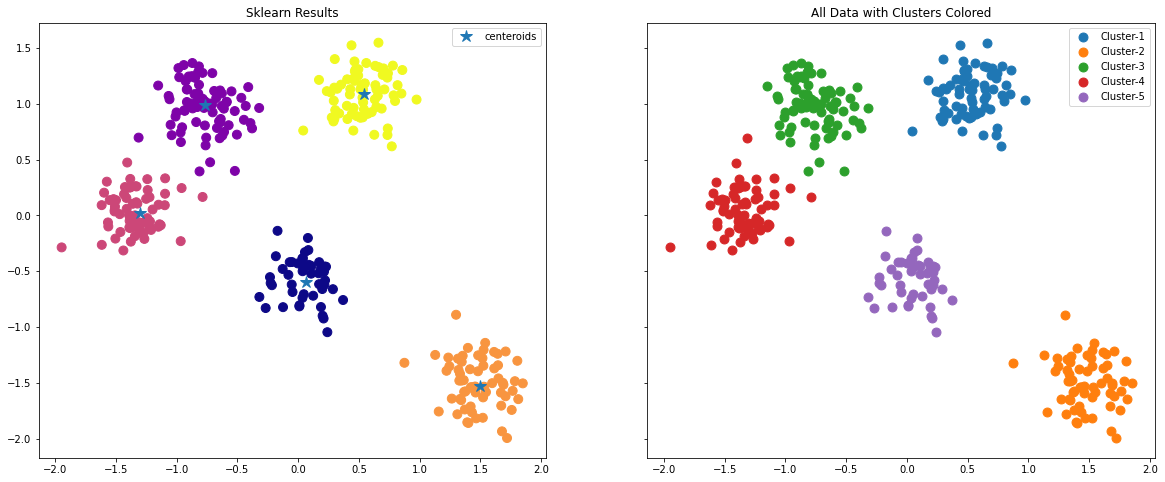

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[:,0],X_test[:,1],s=80,c=yhat_sklearn,cmap='plasma')
ax1.plot([x for x, _ in model.cluster_centers_],
         [y for _, y in model.cluster_centers_],
         '*',markersize=12,label='centeroids')
ax1.set_title('Sklearn Results')
ax1.legend()
ax2.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=80, label="Cluster-1")
ax2.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=80, label="Cluster-2")
ax2.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], s=80, label="Cluster-3")
ax2.scatter(X_test[y_test == 3, 0], X_test[y_test == 3, 1], s=80, label="Cluster-4")
ax2.scatter(X_test[y_test == 4, 0], X_test[y_test == 4, 1], s=80, label="Cluster-5")
ax2.legend()
ax2.set_title('All Data with Clusters Colored')